In [41]:
import os
import sys
import glob
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
%matplotlib inline
%precision 4
plt.style.use('ggplot')

stat = np.mean

In [42]:
def get_sample(n):
    return np.random.gamma(2, 4, n)

DescribeResult(nobs=100L, minmax=(0.48225958876427938, 31.147172618945216), mean=8.7824068767045862, variance=38.787928100104125, skewness=1.5283954184933872, kurtosis=2.5565485547993294)


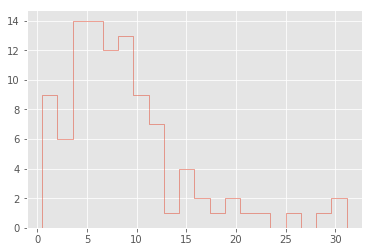

In [46]:
np.random.seed(2000)
n = 100

# sample that contains degrees of the graph
x = get_sample(n)

print st.describe(x)
plt.hist(x, 20, histtype='step');

8.77318512014
bias: -0.00922175656197
variance: 0.385215129224
[  7.5894  10.0171]


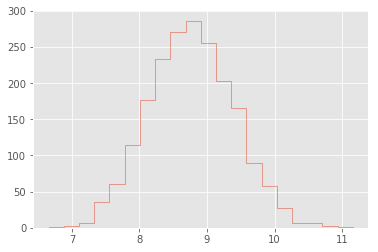

In [47]:
## bootstrap estimation of statistic "stat"
# numder of bootstrap replications - B
B = 2000

# generate bootstrap replications - xb
xb = np.random.choice(x, (n, B), replace=True)

# calculate "stat" on each replication 
xb_star = stat(xb, axis=0)
xb_star.sort()

# print results mean value of the statistic "stat" and the CI for it
print xb_star.mean()
ci = np.percentile(xb_star, [2.5, 97.5])

plt.hist(xb_star, 20, histtype='step');

bias = xb_star.mean() - stat(x)
variance = sum((xb_star - sum(xb_star)/B)**2)/ (B-1)

print "bias:", bias
print "variance:", variance
print ci


In [48]:
# check with sampling from the population (random graphs with n nodes and p=0.155)

a = []
count = 0
total_runs = 1000
for i in range(0, total_runs):
    # draw a sample    
    y = get_sample(n)
    
    # calculate value of statistic (stat_value)
    stat_value = stat(y)
    
    # if CI contains stat_value
    if ci[0]<=stat_value and ci[1]>=stat_value :
        count += 1
#     else:
#         print stat_value
    a.append(stat_value)

print 100.0*count / total_runs, "%"

# mean of the sampling distribution
print np.mean(a)


76.5 %
7.99997692916
